In [1]:
import nltk
import sklearn
from platform import python_version

# Import Libraries
import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from IPython.display import display_html 
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

%matplotlib inline  

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""

    def __init__(self, *args):
        self.args = args

    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                     for a in self.args)

    def __repr__(self):
       return '\n\n'.join(a + '\n' + repr(eval(a))
                       for a in self.args)

newline='\n'

Index(['instant', 'dteday', 'yr', 'mnth', 'weekday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'season_1', 'season_2',
       'season_3', 'season_4', 'weathersit_1', 'weathersit_2', 'weathersit_3',
       'holiday_0', 'holiday_1', 'workingday_0', 'workingday_1'],
      dtype='object')


,instant,dteday,yr,mnth,weekday,temp,atemp,hum,windspeed,casual,...,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,holiday_0,holiday_1,workingday_0,workingday_1
0,-1.729683,-1.674108,-1.001369,-1.600161,1.498809,-0.826662,-0.679946,1.250171,-0.387892,-0.753734,...,-0.579983,-0.588409,-0.567345,-1.314387,1.399826,-0.171981,0.171981,-0.171981,1.471225,-1.471225
1,-1.724944,-1.560522,-1.001369,-1.600161,-1.496077,-0.721095,-0.740652,0.479113,0.749602,-1.045214,...,-0.579983,-0.588409,-0.567345,-1.314387,1.399826,-0.171981,0.171981,-0.171981,1.471225,-1.471225
2,-1.720205,-1.446936,-1.001369,-1.600161,-0.996930,-1.634657,-1.749767,-1.339274,0.746632,-1.061246,...,-0.579983,-0.588409,-0.567345,0.760811,-0.714374,-0.171981,0.171981,-0.171981,-0.679706,0.679706
3,-1.715466,-1.333351,-1.001369,-1.600161,-0.497782,-1.614780,-1.610270,-0.263182,-0.389829,-1.078734,...,-0.579983,-0.588409,-0.567345,0.760811,-0.714374,-0.171981,0.171981,-0.171981,-0.679706,0.679706
4,-1.710728,-1.219765,-1.001369,-1.600161,0.001366,-1.467414,-1.504971,-1.341494,-0.046307,-1.116627,...,-0.579983,-0.588409,-0.567345,0.760811,-0.714374,-0.171981,0.171981,-0.171981,-0.679706,0.679706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.710728,1.279122,0.998633,1.588660,0.500513,-1.318665,-1.521108,0.175807,2.061426,-0.876156,...,-0.579983,-0.588409,-0.567345,-1.314387,1.399826,-0.171981,0.171981,-0.171981,-0.679706,0.679706
727,1.715466,1.392707,0.998633,1.588660,0.999661,-1.323224,-1.346690,-0.266238,-0.452131,-0.297567,...,-0.579983,-0.588409,-0.567345,-1.314387,1.399826,-0.171981,0.171981,-0.171981,-0.679706,0.679706
728,1.720205,1.506293,0.998633,1.588660,1.498809,-1.323224,-1.424344,0.878392,-0.853552,-1.004407,...,-0.579983,-0.588409,-0.567345,-1.314387,1.399826,-0.171981,0.171981,-0.171981,1.471225,-1.471225
729,1.724944,1.619879,0.998633,1.588660,-1.496077,-1.309558,-1.490049,-1.015664,2.069444,-0.705640,...,-0.579983,-0.588409,-0.567345,0.760811,-0.714374,-0.171981,0.171981,-0.171981,1.471225,-1.471225


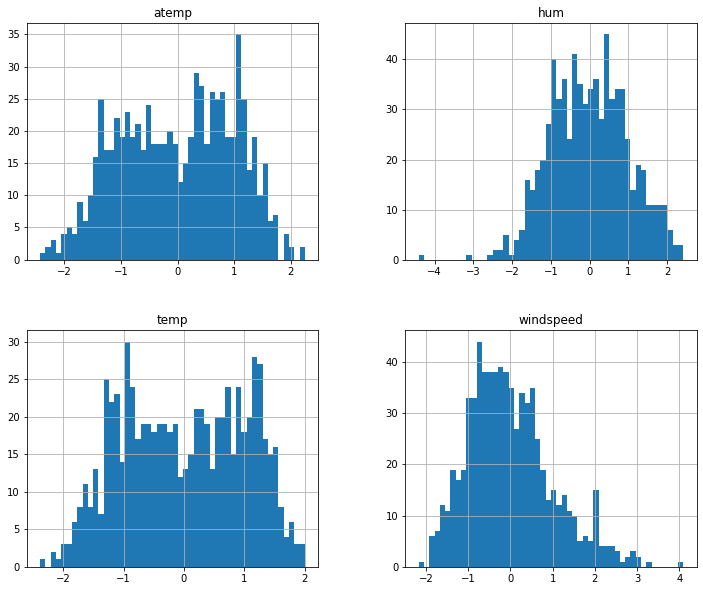

In [2]:
#################################################
#################################################
## This Notebook uses RYAN's encoding/Scaling  ##
#################################################
#################################################

########################### Bike Dataset ##########################
from sklearn.preprocessing import OneHotEncoder 

bike_data = pd.read_csv('../input/project4set2/day.csv')
bike_data_df = pd.DataFrame(data=bike_data)

#### OHE ####
#one hot encode weathersit for sure, season probably, weekday (0-6) maybe
# label encode the date into days of the month
encoded_bike_data = bike_data_df.copy()

encoded_bike_data['dteday'] = pd.to_datetime(bike_data_df['dteday']).dt.strftime('%d')
encoded_bike_data['dteday'] = pd.to_numeric(encoded_bike_data['dteday'])

# use pd.concat to join the new columns with your original dataframe
df_season = pd.concat([encoded_bike_data,pd.get_dummies(encoded_bike_data['season'], prefix='season')],axis=1)

# now drop the original 'country' column (you don't need it anymore)
df_season.drop(['season'],axis=1, inplace=True)

df_weathersit = pd.concat([df_season, pd.get_dummies(df_season['weathersit'], prefix = 'weathersit')], axis=1)
df_weathersit.drop(['weathersit'], axis=1, inplace=True)

df_holiday = pd.concat([df_weathersit, pd.get_dummies(df_weathersit['holiday'], prefix = 'holiday')], axis=1)
df_holiday.drop(['holiday'], axis=1, inplace=True)

df_workday = pd.concat([df_holiday, pd.get_dummies(df_holiday['workingday'], prefix = 'workingday')], axis=1)
df_workday.drop(['workingday'], axis=1, inplace=True)
bike_data_proc_df = df_workday
print(bike_data_proc_df.columns)

#### Save a non-Scaled Copy ####
encodedBikeDataset=bike_data_proc_df.copy(deep=True)
unscaledEncodedBikeDataset = encodedBikeDataset.copy(deep=True)

#### Scaling ####
from sklearn.preprocessing import StandardScaler

#standardize all feature columns
#remove registered and casual?

col_names = bike_data_proc_df.columns
features = bike_data_proc_df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

#assign scaled results to the dataset copy
bike_data_proc_df[col_names] = features
#print(bike_data_proc_df)

############# Incorporate back into Jake's Notebook ##########
encodedBikeDataset=bike_data_proc_df.copy(deep=True)

bike_data_proc_df.hist(column=['temp', 'atemp','hum', 'windspeed'], figsize = (12,10), bins=50)

bikeFeatureList = list(encodedBikeDataset.columns)
bikeFeatureList.remove('cnt')
bikeFeatureList.remove('registered')
bikeFeatureList.remove('casual')

###### Used by the rest of the Notebook ######
encodedBikeDataset

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,...,umem,utime,codec_flv,codec_h264,codec_mpeg4,codec_vp8,o_codec_flv,o_codec_h264,o_codec_mpeg4,o_codec_vp8
0,-0.543270,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.822060,-0.098879,-0.825201,-0.641488,...,-2.111427,-0.582615,-0.332299,-0.920378,2.173999,-0.604022,-0.575985,-0.574776,1.725695,-0.579163
1,-0.543270,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.822060,-0.098879,-0.825201,-0.641488,...,-2.084167,-0.559768,-0.332299,-0.920378,2.173999,-0.604022,-0.575985,-0.574776,1.725695,-0.579163
2,-0.543270,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.822060,-0.098879,-0.825201,-0.641488,...,-2.042455,-0.545116,-0.332299,-0.920378,2.173999,-0.604022,-0.575985,-0.574776,1.725695,-0.579163
3,-0.543270,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.822060,-0.098879,-0.825201,-0.641488,...,-1.990233,-0.515564,-0.332299,-0.920378,2.173999,-0.604022,-0.575985,-0.574776,1.725695,-0.579163
4,-0.543270,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.822060,-0.098879,-0.825201,-0.641488,...,-1.741727,-0.406049,-0.332299,-0.920378,2.173999,-0.604022,-0.575985,-0.574776,1.725695,-0.579163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68779,2.387620,-0.312921,-0.218492,-0.378671,0.797072,5.416577,3.628857,-0.098879,3.656298,1.037117,...,-1.432130,-0.524256,-0.332299,1.086510,-0.459982,-0.604022,1.736157,-0.574776,-0.579477,-0.579163
68780,-0.544926,0.032528,0.280232,-0.049625,0.958016,-0.765280,-0.440548,-0.098879,-0.447030,-0.453909,...,-1.238843,0.531476,-0.332299,-0.920378,-0.459982,1.655568,-0.575985,-0.574776,1.725695,-0.579163
68781,-0.127879,-0.658369,-0.717217,-0.305176,0.252873,0.331882,-0.068911,-0.098879,-0.064958,-0.249780,...,-1.431966,-0.573923,-0.332299,-0.920378,-0.459982,1.655568,1.736157,-0.574776,-0.579477,-0.579163
68782,-0.357837,1.414323,1.277682,1.965863,0.797072,-0.033839,-0.185438,-0.098879,-0.185057,0.556589,...,-1.431802,-0.282627,-0.332299,1.086510,-0.459982,-0.604022,-0.575985,-0.574776,1.725695,-0.579163


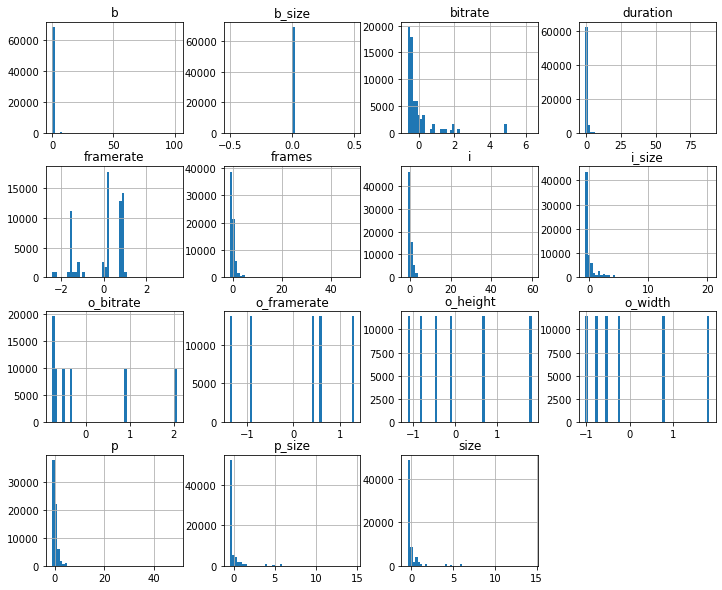

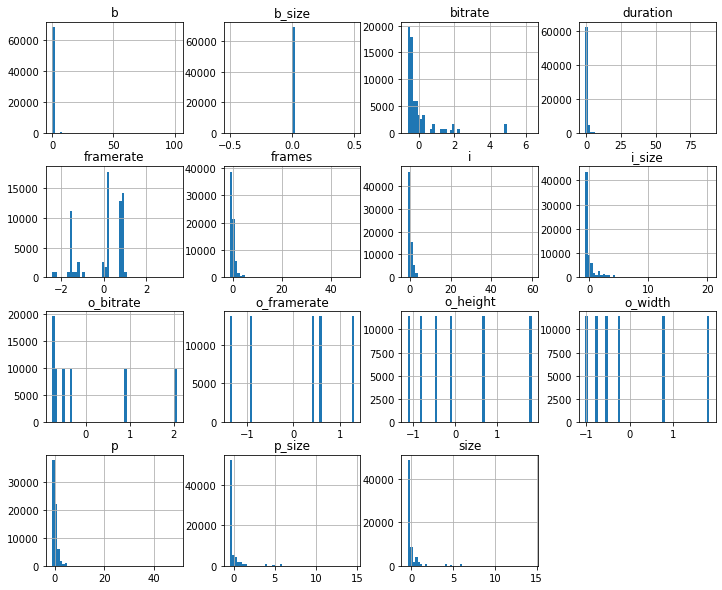

In [3]:
#################################################
#################################################
## This Notebook uses RYAN's encoding/Scaling  ##
#################################################
#################################################

########################### Video Dataset ##########################
video_data = pd.read_csv('../input/project4set2/transcoding_mesurment.tsv', sep='\t')
video_data_df = pd.DataFrame(data=video_data)

#### OHE ####
video_data_noid = video_data_df.copy()
video_data_noid.drop(['id'], axis=1, inplace=True)


df_codec = pd.concat([video_data_noid, pd.get_dummies(video_data_noid['codec'], prefix = 'codec')], axis=1)
df_codec.drop(['codec'], axis=1, inplace=True)


df_o_codec = pd.concat([df_codec, pd.get_dummies(df_codec['o_codec'], prefix = 'o_codec')], axis=1)
df_o_codec.drop(['o_codec'], axis=1, inplace=True)

video_data_proc_df = df_o_codec.copy()


#### Save a non Scaled Copy ###
encodedVideoDataset=video_data_proc_df.copy(deep=True)
unscaledEncodedVideoDataset = encodedVideoDataset.copy(deep=True)

#### Scaling ####
from sklearn.preprocessing import StandardScaler

video_col_names = video_data_proc_df.columns
video_features = video_data_proc_df[video_col_names]
video_scaler = StandardScaler().fit(video_features.values)
video_features = video_scaler.transform(video_features.values)

#assign scaled results to the dataset copy
video_data_proc_df[video_col_names] = video_features
#print(video_data_proc_df)

video_data_proc_df.hist(column=['duration', 'bitrate' , 'framerate' , 'i',  'p', 'b' , 'frames', 'i_size', 'p_size' , 'b_size', 'size', 'o_bitrate', 'o_framerate', 'o_height', 'o_width'
], figsize = (12,10), bins=50)

############# Incorporate back into Jake's Notebook ##########
encodedVideoDataset=video_data_proc_df.copy(deep=True)

video_data_proc_df.hist(column=['duration', 'bitrate' , 'framerate' , 'i',  'p', 'b' , 'frames', 'i_size', 'p_size' , 'b_size', 'size', 'o_bitrate', 'o_framerate', 'o_height', 'o_width'
], figsize = (12,10), bins=50)
videoFeatureList = list(encodedVideoDataset.columns)
videoFeatureList.remove('utime')
videoFeatureList.remove('umem')

###### Used by the rest of the Notebook ######
encodedVideoDataset

In [4]:
#####################################
## Feature Selection: Bike Dataset ##
#####################################
# Target value 'cnt'
bikeMutalInfo = mutual_info_regression(encodedBikeDataset[bikeFeatureList], encodedBikeDataset['cnt'])
bikeFTest, bikePValues = f_regression(encodedBikeDataset[bikeFeatureList], encodedBikeDataset['cnt']) 

# Zip 'features' and 'values'together....
bikeMutalInfoArray = []
bikeFScoreArray = []
bikePvalueArray = []

feature_counter = 0
for feature in bikeFeatureList:
    
    # Interpretable mutual_info_regression() Array.. 
    # dependency between given feature & 'cnt'
    bikeMutalInfoArray.append((feature, bikeMutalInfo[feature_counter]))

    # Interpretable f_score Array.. 
    # including this 'feature' affects performance this much....
    bikeFScoreArray.append((feature, bikeFTest[feature_counter]))
    
    # Interpretable p_value Array.. 
    # how this feature affects target variable (by chance?)....    
    bikePvalueArray.append((feature, bikePValues[feature_counter]))
    
    feature_counter += 1
    
# Sort each array descending order
bikeMutalInfoArray.sort(key = lambda x: x[1], reverse=True)
bikeFScoreArray.sort(key = lambda x: x[1], reverse=True)
bikePvalueArray.sort(key = lambda x: x[1], reverse=True)

# Transform to DataFrame for display and label columns
bikeMutalInfoDf = pd.DataFrame(bikeMutalInfoArray,columns=['Feature', 'Mutual Info'])
bikeFScoreDf = pd.DataFrame(bikeFScoreArray,columns=['Feature', 'F-score'])
bikePValuesDf = pd.DataFrame(bikePvalueArray,columns=['Feature', 'P-Value'])

# Display all thre ordered tables
display_html(bikeMutalInfoDf)
display_html(bikeFScoreDf)
display_html(bikePValuesDf)

,Feature,Mutual Info
0,instant,0.906471
1,atemp,0.464920
2,temp,0.389111
3,mnth,0.375674
4,yr,0.277160
5,season_1,0.193900
6,season_3,0.072222
7,windspeed,0.056105
8,hum,0.046258
9,weekday,0.044625


,Feature,F-score
0,atemp,482.454311
1,instant,476.810740
2,temp,473.471711
3,yr,344.890586
4,season_1,338.467598
5,season_3,99.459088
6,mnth,62.004625
7,weathersit_1,49.798737
8,weathersit_3,44.540374
9,windspeed,42.437842


,Feature,P-Value
0,dteday,5.135051e-01
1,workingday_0,9.849496e-02
2,workingday_1,9.849496e-02
3,season_4,7.634430e-02
4,weekday,6.839081e-02
5,holiday_0,6.475936e-02
6,holiday_1,6.475936e-02
7,hum,6.454143e-03
8,season_2,7.268728e-05
9,weathersit_2,2.581480e-06


In [5]:
######################################
## Feature Selection: Video Dataset ##
######################################
videoMutalInfo = mutual_info_regression(encodedVideoDataset[videoFeatureList][0:20000], encodedVideoDataset[0:20000]['utime'],n_neighbors=3)
videoFTest, videoPValues = f_regression(encodedVideoDataset[videoFeatureList], encodedVideoDataset['utime']) 

# Zip 'features' and 'values'together...
videoMutalInfoArray = []
videoFScoreArray = []
videoPvalueArray = []

feature_counter = 0
for feature in videoFeatureList:
    
    # Interpretable mutual_info_regression() Array.. 
    # dependency between given feature & 'utime'
    videoMutalInfoArray.append((feature, videoMutalInfo[feature_counter]))

    # Interpretable f_score Array.. 
    # including this 'feature' affects performance this much....
    videoFScoreArray.append((feature, videoFTest[feature_counter]))
    
    # Interpretable p_value Array.. 
    # how this feature affects target variable (by chance?)....    
    videoPvalueArray.append((feature, videoPValues[feature_counter]))
    
    feature_counter += 1
    
# Sort each array descending order
videoMutalInfoArray.sort(key = lambda x: x[1], reverse=True)
videoFScoreArray.sort(key = lambda x: x[1], reverse=True)
videoPvalueArray.sort(key = lambda x: x[1], reverse=True)

# Transform to DataFrame for display and label columns
videoMutalInfoDf = pd.DataFrame(videoMutalInfoArray,columns=['Feature', 'Mutual Info'])
videoFScoreDf = pd.DataFrame(videoFScoreArray,columns=['Feature', 'F-score'])
videoPValuesDf = pd.DataFrame(videoPvalueArray,columns=['Feature', 'P-Value'])

# Display all thre ordered tables
display_html(videoMutalInfoDf)
display_html(videoFScoreDf)
display_html(videoPValuesDf)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,Feature,Mutual Info
0,o_height,0.362225
1,o_width,0.361936
2,bitrate,0.298468
3,p_size,0.297234
4,frames,0.297167
5,p,0.295692
6,duration,0.295100
7,size,0.294166
8,i_size,0.287587
9,i,0.286728


,Feature,F-score
0,b_size,NaN
1,o_width,25950.518895
2,o_height,25444.403222
3,o_codec_h264,12922.464116
4,o_codec_flv,5350.164834
5,o_codec_mpeg4,2056.537938
6,o_bitrate,1703.902785
7,bitrate,1697.644672
8,width,1179.829517
9,height,1154.421640


,Feature,P-Value
0,b_size,NaN
1,codec_flv,2.372373e-01
2,b,1.776859e-01
3,duration,1.467846e-01
4,codec_vp8,9.394174e-04
5,i,1.238180e-06
6,frames,3.718494e-18
7,p,3.047665e-18
8,o_codec_vp8,1.943550e-28
9,codec_h264,4.499795e-44


In [6]:
#############
## Methods ##
#############

def Calcualte_Optimal_Degree(model, X, Y, degreeList):
    
    RMSE_Degree_List = []
    LOOP_COUNTER = 1
    
    for degree in degreeList:
        
        
        # Add the polynomial features
        print(f'Using {degree} Polynomial degrees for this run... {newline}')
        print(f'Feature Matrix ORIGINAL Shape (datapoints, features): {X.shape}')
        polynomial_features = PolynomialFeatures(degree=degree)
        X_poly = polynomial_features.fit_transform(X)
        print(f'Feature Matrix POLYNOMIAL Shape (datapoints, features): {X_poly.shape}{newline}')

        # Perform 10-Fold CV: Returns list of negative RMSE for each run (10)
        # If model is Lasso() or Ridge(), find the optimal penalty value!
        if isinstance(model, LinearRegression):
            cv10_neg_RMSE = cross_val_score(model, X_poly, Y, scoring='neg_root_mean_squared_error', cv=10)
        
        else:
            # Perform a grid search to get optimal 'alpha' value
            params = {'alpha':[1e-5,1e-4,1e-3,1e-2,0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5, 10,20,30,40,50,100, 200, 300, 400,500]}
            gridSearch = GridSearchCV(model ,params, scoring='neg_root_mean_squared_error', cv=10)
            gridSearch.fit(X_poly, Y)
            
            print(f'Grid Search Results... Best Penalty Value (alpha): {gridSearch.best_params_} ')
            print(f'Grid Search Results... Best Penalty Value (alpha): {gridSearch.best_score_*-1} {newline}')
            
            # Perform Cross Validation with the optimal penalty value
            optimalAlpha = gridSearch.best_params_['alpha']
            model.alpha= optimalAlpha
            cv10_neg_RMSE = cross_val_score(model, X_poly, Y, scoring='neg_root_mean_squared_error', cv=10)            
            
        # Calculate average RMSE for this 10-Fold run. Muliplty by (-1) to make positive
        avgRMSE = np.mean(cv10_neg_RMSE) *-1
        print(f'Average RMSE for this KFold run {LOOP_COUNTER}/{len(degreeList)}: {avgRMSE}{newline}')
    
        # Append to Running List
        RMSE_Degree_List.append(avgRMSE)
        
        # Update Counter
        LOOP_COUNTER +=1
        print('='*40)
        
    return RMSE_Degree_List

Using 1 Polynomial degrees for this run... 

Feature Matrix ORIGINAL Shape (datapoints, features): (731, 20)
Feature Matrix POLYNOMIAL Shape (datapoints, features): (731, 21)

Average RMSE for this KFold run 1/3: 0.46180689859697255

Using 2 Polynomial degrees for this run... 

Feature Matrix ORIGINAL Shape (datapoints, features): (731, 20)
Feature Matrix POLYNOMIAL Shape (datapoints, features): (731, 231)

Average RMSE for this KFold run 2/3: 0.7173401850052193

Using 3 Polynomial degrees for this run... 

Feature Matrix ORIGINAL Shape (datapoints, features): (731, 20)
Feature Matrix POLYNOMIAL Shape (datapoints, features): (731, 1771)

Average RMSE for this KFold run 3/3: 557788202.5631261

Average RMSE vs. Polynomial Degrees: [1, 2, 3]


,Average RMSE
1,4.618069e-01
2,7.173402e-01
3,5.577882e+08


Text(0, 0.5, 'Average RMSE')

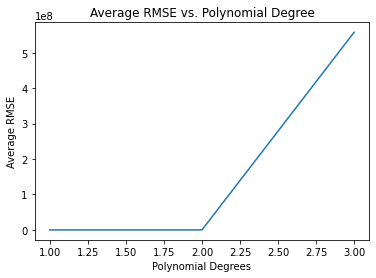

In [7]:
########################################################################################
## Optimal 'degree' : Oridnal Linear Regression, Standardized Features,  All Features ##
########################################################################################

degreeList = [1,2,3]
model = LinearRegression(normalize=False)
X = encodedBikeDataset[bikeFeatureList]
Y = encodedBikeDataset['cnt']

RMSEList = Calcualte_Optimal_Degree(model, X, Y, degreeList)

print(f'Average RMSE vs. Polynomial Degrees: {degreeList}')
RMSEFrame = pd.DataFrame(RMSEList, columns=['Average RMSE'], index=degreeList)
display_html(RMSEFrame)

plt.plot(degreeList,RMSEList)
plt.title('Average RMSE vs. Polynomial Degree')
plt.xlabel('Polynomial Degrees')
plt.ylabel('Average RMSE')

Using 1 Polynomial degrees for this run... 

Feature Matrix ORIGINAL Shape (datapoints, features): (731, 20)
Feature Matrix POLYNOMIAL Shape (datapoints, features): (731, 21)



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.47975669899263, tolerance: 0.05331093559749604
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37.39933604121177, tolerance: 0.06810796273049605
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.767569236777696, tolerance: 0.07244646057959403
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.41

Grid Search Results... Best Penalty Value (alpha): {'alpha': 0.01} 
Grid Search Results... Best Penalty Value (alpha): 0.4562246154502545 

Average RMSE for this KFold run 1/3: 0.4562246154502545

Using 2 Polynomial degrees for this run... 

Feature Matrix ORIGINAL Shape (datapoints, features): (731, 20)
Feature Matrix POLYNOMIAL Shape (datapoints, features): (731, 231)



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.058682800617390285, tolerance: 0.05740875566762194
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.16666089167087, tolerance: 0.05331093559749604
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.30356731822408, tolerance: 0.06810796273049605
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.

Grid Search Results... Best Penalty Value (alpha): {'alpha': 0.01} 
Grid Search Results... Best Penalty Value (alpha): 0.4360118851842774 



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06290806033895535, tolerance: 0.061403872386564924
  positive)


Average RMSE for this KFold run 2/3: 0.4360118851842774

Using 3 Polynomial degrees for this run... 

Feature Matrix ORIGINAL Shape (datapoints, features): (731, 20)
Feature Matrix POLYNOMIAL Shape (datapoints, features): (731, 1771)



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.89123000867797, tolerance: 0.05331093559749604
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.111982375174614, tolerance: 0.06810796273049605
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.425339721721235, tolerance: 0.07244646057959403
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.11967

Grid Search Results... Best Penalty Value (alpha): {'alpha': 0.01} 
Grid Search Results... Best Penalty Value (alpha): 0.5338577885662794 



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2148745122199216, tolerance: 0.05331093559749604
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2387497350060812, tolerance: 0.06810796273049605
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09452434862390646, tolerance: 0.06746891037628402
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.

Average RMSE for this KFold run 3/3: 0.5338577885662794

Average RMSE vs. Polynomial Degrees: [1, 2, 3]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.38108378540242427, tolerance: 0.06621466841749783
  positive)


,Average RMSE
1,0.456225
2,0.436012
3,0.533858


Text(0, 0.5, 'Average RMSE')

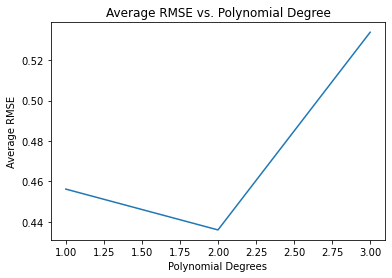

In [8]:
########################################################################################
## Optimal 'degree' : Oridnal Linear Regression, Standardized Features,  All Features ##
########################################################################################

degreeList = [1,2,3]
model = Lasso(normalize=False, max_iter=1000)
X = encodedBikeDataset[bikeFeatureList]
Y = encodedBikeDataset['cnt']

RMSEList = Calcualte_Optimal_Degree(model, X, Y, degreeList)

print(f'Average RMSE vs. Polynomial Degrees: {degreeList}')
RMSEFrame = pd.DataFrame(RMSEList, columns=['Average RMSE'], index=degreeList)
display_html(RMSEFrame)

plt.plot(degreeList,RMSEList)
plt.title('Average RMSE vs. Polynomial Degree')
plt.xlabel('Polynomial Degrees')
plt.ylabel('Average RMSE')

Using 1 Polynomial degrees for this run... 

Feature Matrix ORIGINAL Shape (datapoints, features): (731, 20)
Feature Matrix POLYNOMIAL Shape (datapoints, features): (731, 21)

Grid Search Results... Best Penalty Value (alpha): {'alpha': 100} 
Grid Search Results... Best Penalty Value (alpha): 0.45173082629915245 

Average RMSE for this KFold run 1/3: 0.45173082629915245

Using 2 Polynomial degrees for this run... 

Feature Matrix ORIGINAL Shape (datapoints, features): (731, 20)
Feature Matrix POLYNOMIAL Shape (datapoints, features): (731, 231)

Grid Search Results... Best Penalty Value (alpha): {'alpha': 50} 
Grid Search Results... Best Penalty Value (alpha): 0.4723206660716174 

Average RMSE for this KFold run 2/3: 0.4723206660716174

Using 3 Polynomial degrees for this run... 

Feature Matrix ORIGINAL Shape (datapoints, features): (731, 20)
Feature Matrix POLYNOMIAL Shape (datapoints, features): (731, 1771)

Grid Search Results... Best Penalty Value (alpha): {'alpha': 300} 
Grid Sear

,Average RMSE
1,0.451731
2,0.472321
3,0.522296


Text(0, 0.5, 'Average RMSE')

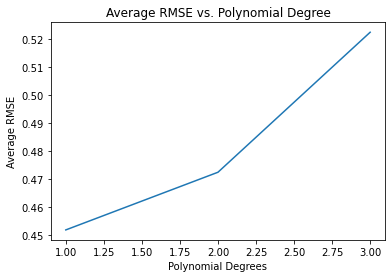

In [9]:
########################################################################################
## Optimal 'degree' : Oridnal Linear Regression, Standardized Features,  All Features ##
########################################################################################

degreeList = [1,2,3]
model = Ridge(normalize=False, max_iter=1000)
X = encodedBikeDataset[bikeFeatureList]
Y = encodedBikeDataset['cnt']

RMSEList = Calcualte_Optimal_Degree(model, X, Y, degreeList)

print(f'Average RMSE vs. Polynomial Degrees: {degreeList}')
RMSEFrame = pd.DataFrame(RMSEList, columns=['Average RMSE'], index=degreeList)
display_html(RMSEFrame)

plt.plot(degreeList,RMSEList)
plt.title('Average RMSE vs. Polynomial Degree')
plt.xlabel('Polynomial Degrees')
plt.ylabel('Average RMSE')

Using 1 Polynomial degrees for this run... 

Feature Matrix ORIGINAL Shape (datapoints, features): (68784, 25)
Feature Matrix POLYNOMIAL Shape (datapoints, features): (68784, 26)

Average RMSE for this KFold run 1/3: 19245153.583659627

Using 2 Polynomial degrees for this run... 

Feature Matrix ORIGINAL Shape (datapoints, features): (68784, 25)
Feature Matrix POLYNOMIAL Shape (datapoints, features): (68784, 351)

Average RMSE for this KFold run 2/3: 31801844350.520466

Using 3 Polynomial degrees for this run... 

Feature Matrix ORIGINAL Shape (datapoints, features): (68784, 25)
Feature Matrix POLYNOMIAL Shape (datapoints, features): (68784, 3276)

Average RMSE for this KFold run 3/3: 81358539069.77628

Average RMSE vs. Polynomial Degrees: [1, 2, 3]


,Average RMSE
1,1.924515e+07
2,3.180184e+10
3,8.135854e+10


Text(0, 0.5, 'Average RMSE')

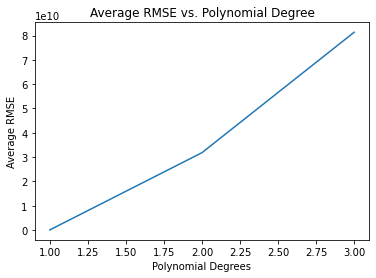

In [10]:
########################################################################################
## Optimal 'degree' : Oridnal Linear Regression, Standardized Features,  All Features ##
########################################################################################

degreeList = [1,2,3]
model = LinearRegression(normalize=False)
X = encodedVideoDataset[videoFeatureList]
Y = encodedVideoDataset['utime']

RMSEList = Calcualte_Optimal_Degree(model, X, Y, degreeList)

print(f'Average RMSE vs. Polynomial Degrees: {degreeList}')
RMSEFrame = pd.DataFrame(RMSEList, columns=['Average RMSE'], index=degreeList)
display_html(RMSEFrame)

plt.plot(degreeList,RMSEList)
plt.title('Average RMSE vs. Polynomial Degree')
plt.xlabel('Polynomial Degrees')
plt.ylabel('Average RMSE')

Using 1 Polynomial degrees for this run... 

Feature Matrix ORIGINAL Shape (datapoints, features): (68784, 25)
Feature Matrix POLYNOMIAL Shape (datapoints, features): (68784, 26)



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14540.01497250239, tolerance: 6.134285460275728
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14772.11082717425, tolerance: 6.179724557124816
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14749.34466652231, tolerance: 6.184144177993093
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14602.001421

Grid Search Results... Best Penalty Value (alpha): {'alpha': 0.01} 
Grid Search Results... Best Penalty Value (alpha): 0.6908635023774182 



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9759.59082250738, tolerance: 6.1380148962552
  positive)


Average RMSE for this KFold run 1/3: 0.6908635023774182

Using 2 Polynomial degrees for this run... 

Feature Matrix ORIGINAL Shape (datapoints, features): (68784, 25)
Feature Matrix POLYNOMIAL Shape (datapoints, features): (68784, 351)



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5245.81443623466, tolerance: 6.134285460275728
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5403.068054226031, tolerance: 6.179724557124816
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5377.284872252111, tolerance: 6.184144177993093
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5350.21434255

Grid Search Results... Best Penalty Value (alpha): {'alpha': 0.1} 
Grid Search Results... Best Penalty Value (alpha): 0.5329123705922593 



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2611.767727747123, tolerance: 6.134285460275728
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2484.22970653057, tolerance: 6.179724557124816
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2645.2666990266935, tolerance: 6.184144177993093
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2540.6035313

Average RMSE for this KFold run 2/3: 0.5329123705922593

Using 3 Polynomial degrees for this run... 

Feature Matrix ORIGINAL Shape (datapoints, features): (68784, 25)
Feature Matrix POLYNOMIAL Shape (datapoints, features): (68784, 3276)



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2614.9080444934757, tolerance: 6.134285460275728
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2739.3436472937065, tolerance: 6.179724557124816
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2711.4174067696904, tolerance: 6.184144177993093
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2710.9517

Grid Search Results... Best Penalty Value (alpha): {'alpha': 0.01} 
Grid Search Results... Best Penalty Value (alpha): 0.6319744889922282 



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5913.008633672256, tolerance: 6.134285460275728
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6020.357480622731, tolerance: 6.179724557124816
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5990.747847069835, tolerance: 6.184144177993093
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5964.5909525

Average RMSE for this KFold run 3/3: 0.6319744889922282

Average RMSE vs. Polynomial Degrees: [1, 2, 3]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5341.593010992745, tolerance: 6.1380148962552
  positive)


,Average RMSE
1,0.690864
2,0.532912
3,0.631974


Text(0, 0.5, 'Average RMSE')

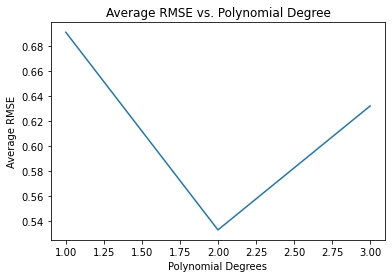

In [11]:
########################################################################################
## Optimal 'degree' : Oridnal Linear Regression, Standardized Features,  All Features ##
########################################################################################

degreeList = [1,2,3]
model = Lasso(normalize=False, max_iter=1)
X = encodedVideoDataset[videoFeatureList]
Y = encodedVideoDataset['utime']

RMSEList = Calcualte_Optimal_Degree(model, X, Y, degreeList)

print(f'Average RMSE vs. Polynomial Degrees: {degreeList}')
RMSEFrame = pd.DataFrame(RMSEList, columns=['Average RMSE'], index=degreeList)
display_html(RMSEFrame)

plt.plot(degreeList,RMSEList)
plt.title('Average RMSE vs. Polynomial Degree')
plt.xlabel('Polynomial Degrees')
plt.ylabel('Average RMSE')

Using 1 Polynomial degrees for this run... 

Feature Matrix ORIGINAL Shape (datapoints, features): (68784, 25)
Feature Matrix POLYNOMIAL Shape (datapoints, features): (68784, 26)

Grid Search Results... Best Penalty Value (alpha): {'alpha': 400} 
Grid Search Results... Best Penalty Value (alpha): 0.6861905022102569 

Average RMSE for this KFold run 1/3: 0.6861905022102569

Using 2 Polynomial degrees for this run... 

Feature Matrix ORIGINAL Shape (datapoints, features): (68784, 25)
Feature Matrix POLYNOMIAL Shape (datapoints, features): (68784, 351)

Grid Search Results... Best Penalty Value (alpha): {'alpha': 500} 
Grid Search Results... Best Penalty Value (alpha): 0.5158541129476861 

Average RMSE for this KFold run 2/3: 0.5158541129476861

Using 3 Polynomial degrees for this run... 

Feature Matrix ORIGINAL Shape (datapoints, features): (68784, 25)
Feature Matrix POLYNOMIAL Shape (datapoints, features): (68784, 3276)



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.49977e-17): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.4961e-17): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.49413e-17): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.49443e-17): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.12269e-17): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlg

Grid Search Results... Best Penalty Value (alpha): {'alpha': 500} 
Grid Search Results... Best Penalty Value (alpha): 18.467364675118063 

Average RMSE for this KFold run 3/3: 18.467364675118063

Average RMSE vs. Polynomial Degrees: [1, 2, 3]


,Average RMSE
1,0.686191
2,0.515854
3,18.467365


Text(0, 0.5, 'Average RMSE')

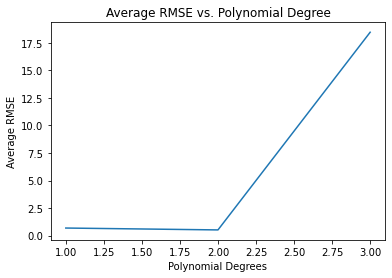

In [12]:
########################################################################################
## Optimal 'degree' : Oridnal Linear Regression, Standardized Features,  All Features ##
########################################################################################

degreeList = [1,2,3]
model = Ridge(normalize=False, max_iter=1000)
X = encodedVideoDataset[videoFeatureList]
Y = encodedVideoDataset['utime']

RMSEList = Calcualte_Optimal_Degree(model, X, Y, degreeList)

print(f'Average RMSE vs. Polynomial Degrees: {degreeList}')
RMSEFrame = pd.DataFrame(RMSEList, columns=['Average RMSE'], index=degreeList)
display_html(RMSEFrame)

plt.plot(degreeList,RMSEList)
plt.title('Average RMSE vs. Polynomial Degree')
plt.xlabel('Polynomial Degrees')
plt.ylabel('Average RMSE')

In [13]:
#comment